# SİGARA İÇENLERİN TAHMİN EDİLMESİ

### Bu veri analiz projesini hangi amaçla gerçekleştiriyorsunuz? 

Bu verisetinde sigara içen ve içmeyen insanlara ait bilgiler bulunmaktadır. Bu veriler ışığında bir bireye ait eldeki veriler kullanılarak bireyin sigara içip içmediğini tahmin etmeği amaçlamaktadır. Ayrıca veri seti dikkate alınarak sigara içen ve içmeyen insanlarda oluşan farklılıklar saptanabilir.Oluşturulan modeller sayesinde sigara kullanan insanların, sigara kullanmayan insanlara göre vücutlarında oluşabilecek zararların tespiti için de kullanılabilir.

### Neyi hesaplamaya çalışıyorsunuz ve neden?

Veriseti üzerinde toplam 24 özellik bulunmkatadır. Bu özelliklerin hepsi model oluşturmak için gerekli değildir. Bu sebeple Bireyin sigara kullanıp/kullanmadığının tahmini yapılırken hangi bilgilerin belirleyici olduğunu ve hangilerinin önemsiz olduğunu belirlemeye çalışıyoruz. Bu sayede eldeki daha az bilgi ile daha doğru sonuçlar yapılabilir. Yapılan veri analizleri sonucunda sigara içen bireylerin içmeyen bireylere göre vücutlarında oluşan değişimler nelerdir?

# Motivasyon

Sigaranın insanlar üzerindeki olumsuz etkilerin ortaya çıkarılması ve sigara içen bireylerle bu bilgiler paylaşılarak daha sağlıklı bir yaşama sahip olabilmeleri için sigarayı bıraktırırken elde edilenler bilgilerden yararlanılabilir.Bu doğrultuda sigaraya başlayacak veya uzun süredir kullanan insanları caydırmak için bir caydırıcı güç olaraka kullanılabilir. Ayrıca sigara içen gençlerin ebeveynleri tarafından daha erken saptanması ve müdahale edilmesine olanak tanımaktadır.

# Metodoloji

### Kullanılan Algoritmalar

<ul>
  <li>KNN</li>
  <li>Random Forest</li>
  <li>Logistic Regression</li>
</ul>

# Veriseti

# ÖZELLİKLER
data shape : (55692, 27)

ID : index <br>
gender <br>
age : 5-years gap <br>
height(cm) <br>
weight(kg) <br>
waist(cm) : Waist circumference length <br>
eyesight(left) <br>
eyesight(right) <br>
hearing(left) <br>
hearing(right) <br>
systolic : Blood pressure <br>
relaxation : Blood pressure <br>
fasting blood sugar <br>
Cholesterol : total <br>
triglyceride <br>
HDL : cholesterol type <br>
LDL : cholesterol type <br>
hemoglobin <br>
Urine protein <br>
serum creatinine <br>
AST : glutamic oxaloacetic transaminase type <br>
ALT : glutamic oxaloacetic transaminase type <br>
Gtp : γ-GTP <br>
oral : Oral Examination status <br>
dental caries <br>
tartar : tartar status <br>
smoking <br>

Yapılan işlemler doğrultusunda şu özellikler çıktı etiketini belirlemede etkili olmuştur:
 gender,<br>
 height(cm),<br>
 weight(kg),<br>
 waist(cm),<br>
 triglyceride,<br>
 hemoglobin,<br>
 serum creatinine,<br>
 Gtp,<br>


# Sonuçlar

## Çarpıcı Sonuçlar

*Veriseti üzerinde yapılan çalışmalar sonucunda sigara kullanan bireylerin %95 gibi büyük bir kısmını erkekler oluşturmaktadır.

*Veriseti üzerindeki özelliklerin korelasyonları incelendiğinde etiketler ile yüksek korelasyona sahip olan özelliklerin aynı 
zamanda cinsiyet özelliği ilede yüksek korelasyona sahip olduğu görüldü. Bu sebeple incelemelerde erkek/kadın olarak ayrımlar
yapıldıktan sonra incelemeler yapıldı.

Sigara içen ve içmeyenler arasındaki farklar:<br>
    <ul>
      <li>Triglyceride sigara içen ve içmeyen insanlarda %10-%20 oranında fark oluşmaktadır.</li>
      <li>Sigara içen insanlarda GTP değeri içmeyen insanlara göre %20 oranında daha düşük olmaktadır.</li>
    </ul>
     <br>
     
 Algoritmalar:
 Aşağırdaki Dataframe üzerindede gösterildiği üzere en iyi model <b>Random Forest <b> modeli olarak belirlendi.
 

In [1]:
# lst = [
#         ["KNN",f1_score(y,knn_pred), precision_score(y,knn_pred),recall_score(y,knn_pred)], 
#         ["Random Forest",f1_score(y,rf_pred), precision_score(y,rf_pred),recall_score(y,rf_pred)],
#         ['SVM',f1_score(y,svm_pred), precision_score(y,svm_pred),recall_score(y,svm_pred)]
#       ]
    
# result = pd.DataFrame(lst, columns =['Algortihm Name', 'F1-Score', 'Precision',"Recall"])
# result

Veri Seti Link : <a href="https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking"> Smoking </a>

# Import Lıbrary

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.metrics import classification_report, confusion_matrix



# LOAD DATA

In [3]:
df = pd.read_csv("../input/body-signal-of-smoking/smoking.csv")
df = df.drop(columns=["ID","oral"])
df.head().T

0      1      2      3      4
gender                   F      F      M      M      F
age                     40     40     55     40     40
height(cm)             155    160    170    165    155
weight(kg)              60     60     60     70     60
waist(cm)             81.3   81.0   80.0   88.0   86.0
eyesight(left)         1.2    0.8    0.8    1.5    1.0
eyesight(right)        1.0    0.6    0.8    1.5    1.0
hearing(left)          1.0    1.0    1.0    1.0    1.0
hearing(right)         1.0    1.0    1.0    1.0    1.0
systolic             114.0  119.0  138.0  100.0  120.0
relaxation            73.0   70.0   86.0   60.0   74.0
fasting blood sugar   94.0  130.0   89.0   96.0   80.0
Cholesterol          215.0  192.0  242.0  322.0  184.0
triglyceride          82.0  115.0  182.0  254.0   74.0
HDL                   73.0   42.0   55.0   45.0   62.0
LDL                  126.0  127.0  151.0  226.0  107.0
hemoglobin            12.9   12.7   15.8   14.7   12.5
Urine protein          1.0    1.0    1.0    1.0    1.0
serum creatinine       0.7    0.6    1.0    1.0    0.6
AST                   18.0   22.0   21.0   19.0   16.0
ALT                   19.0   19.0   16.0   26.0   14.0
Gtp                   27.0   18.0   22.0   18.0   22.0
dental caries            0      0      0      0      0
tartar                   Y      Y      N      Y      N
smoking                  0      0      1      0      0

In [4]:
decode_feature = ["gender","tartar"]
for i in decode_feature:
    df[i] = LabelEncoder().fit_transform(df[i])

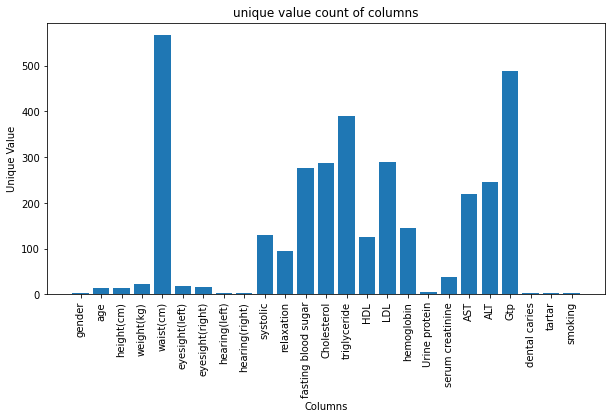

In [5]:
a = df.nunique()
fig = plt.figure(figsize = (10, 5))
plt.xlabel("Columns")
plt.xticks(rotation = 90)
plt.ylabel("Unique Value")
plt.title("unique value count of columns")
plt.bar(df.columns,df.nunique())
plt.show()


# MISSING VALUE

In [6]:
df.isnull()

gender    age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0       False  False       False       False      False           False   
1       False  False       False       False      False           False   
2       False  False       False       False      False           False   
3       False  False       False       False      False           False   
4       False  False       False       False      False           False   
...       ...    ...         ...         ...        ...             ...   
55687   False  False       False       False      False           False   
55688   False  False       False       False      False           False   
55689   False  False       False       False      False           False   
55690   False  False       False       False      False           False   
55691   False  False       False       False      False           False   

       eyesight(right)  hearing(left)  hearing(right)  systolic  ...    LDL  \
0                False          False           False     False  ...  False   
1                False          False           False     False  ...  False   
2                False          False           False     False  ...  False   
3                False          False           False     False  ...  False   
4                False          False           False     False  ...  False   
...                ...            ...             ...       ...  ...    ...   
55687            False          False           False     False  ...  False   
55688            False          False           False     False  ...  False   
55689            False          False           False     False  ...  False   
55690            False          False           False     False  ...  False   
55691            False          False           False     False  ...  False   

       hemoglobin  Urine protein  serum creatinine    AST    ALT    Gtp  \
0           False          False             False  False  False  False   
1           False          False             False  False  False  False   
2           False          False             False  False  False  False   
3           False          False             False  False  False  False   
4           False          False             False  False  False  False   
...           ...            ...               ...    ...    ...    ...   
55687       False          False             False  False  False  False   
55688       False          False             False  False  False  False   
55689       False          False             False  False  False  False   
55690       False          False             False  False  False  False   
55691       False          False             False  False  False  False   

       dental caries  tartar  smoking  
0              False   False    False  
1              False   False    False  
2              False   False    False  
3              False   False    False  
4              False   False    False  
...              ...     ...      ...  
55687          False   False    False  
55688          False   False    False  
55689          False   False    False  
55690          False   False    False  
55691          False   False    False  

[55692 rows x 25 columns]

In [7]:
df.isnull().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [8]:
print("Old Shape : ",df.shape)
df.dropna(inplace=True)
print("New Shape : ",df.shape)

Old Shape :  (55692, 25)
New Shape :  (55692, 25)


# OUTLIER

In [9]:
kategorik = []
surekli   = []
value = df.nunique()
indis = int(0)
for i in value:
    if i<7:
        kategorik.append(indis)
    else:
        surekli.append(indis)
    indis += 1

In [10]:
surekli_col = []
for i in surekli:
    surekli_col.append(df.columns[i])
print(len(surekli_col))

18


In [11]:
# feature_selected = df[important_feature]
print("old shape : ",df.shape)
alt = pd.DataFrame()
ust = pd.DataFrame()
for col in surekli_col:
    Q1 = np.percentile(df[col], 25,interpolation = 'midpoint')
    Q3 = np.percentile(df[col], 75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    up = (Q3+1.5*IQR)
    down = (Q1-1.5*IQR)
    df = df.loc[(df[col] >= down) & (df[col] <= up)]
print("New Shape: ", df.shape)

old shape :  (55692, 25)
New Shape:  (33952, 25)


In [12]:
# df.iloc[:,surekli] = MinMaxScaler(feature_range=(0,1)).fit_transform(df.iloc[:,surekli])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33952 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               33952 non-null  int64  
 1   age                  33952 non-null  int64  
 2   height(cm)           33952 non-null  int64  
 3   weight(kg)           33952 non-null  int64  
 4   waist(cm)            33952 non-null  float64
 5   eyesight(left)       33952 non-null  float64
 6   eyesight(right)      33952 non-null  float64
 7   hearing(left)        33952 non-null  float64
 8   hearing(right)       33952 non-null  float64
 9   systolic             33952 non-null  float64
 10  relaxation           33952 non-null  float64
 11  fasting blood sugar  33952 non-null  float64
 12  Cholesterol          33952 non-null  float64
 13  triglyceride         33952 non-null  float64
 14  HDL                  33952 non-null  float64
 15  LDL                  33952 non-null 

In [14]:
df.describe().T

count        mean        std    min    25%    50%  \
gender               33952.0    0.596519   0.490603    0.0    0.0    1.0   
age                  33952.0   43.375943  11.826631   20.0   35.0   40.0   
height(cm)           33952.0  164.446130   9.137674  145.0  155.0  165.0   
weight(kg)           33952.0   64.007864  11.486014   35.0   55.0   65.0   
waist(cm)            33952.0   80.275333   8.360542   58.0   74.2   80.0   
eyesight(left)       33952.0    1.011027   0.297385    0.3    0.8    1.0   
eyesight(right)      33952.0    1.006512   0.296371    0.3    0.8    1.0   
hearing(left)        33952.0    1.021884   0.146306    1.0    1.0    1.0   
hearing(right)       33952.0    1.021795   0.146017    1.0    1.0    1.0   
systolic             33952.0  119.400448  12.206397   85.0  110.0  119.0   
relaxation           33952.0   74.596578   8.488258   54.0   69.0   75.0   
fasting blood sugar  33952.0   94.582734   9.777793   68.0   88.0   94.0   
Cholesterol          33952.0  193.899741  32.116905  104.0  171.0  192.0   
triglyceride         33952.0  108.403040  51.918358    8.0   69.0   97.0   
HDL                  33952.0   57.853558  12.869077   21.0   48.0   57.0   
LDL                  33952.0  114.456615  29.672562   29.0   93.0  113.0   
hemoglobin           33952.0   14.511425   1.413097   10.3   13.5   14.6   
Urine protein        33952.0    1.063501   0.324774    1.0    1.0    1.0   
serum creatinine     33952.0    0.875677   0.162724    0.6    0.8    0.9   
AST                  33952.0   22.191506   5.396125    6.0   18.0   21.0   
ALT                  33952.0   20.136016   8.067738    1.0   14.0   18.0   
Gtp                  33952.0   24.778599  12.242278    3.0   16.0   21.0   
dental caries        33952.0    0.207116   0.405245    0.0    0.0    0.0   
tartar               33952.0    0.548333   0.497666    0.0    0.0    1.0   
smoking              33952.0    0.321424   0.467030    0.0    0.0    0.0   

                       75%    max  
gender                 1.0    1.0  
age                   50.0   75.0  
height(cm)           170.0  185.0  
weight(kg)            70.0  105.0  
waist(cm)             86.0  106.1  
eyesight(left)         1.2    1.6  
eyesight(right)        1.2    1.6  
hearing(left)          1.0    2.0  
hearing(right)         1.0    2.0  
systolic             128.0  157.0  
relaxation            80.0   97.0  
fasting blood sugar  101.0  124.0  
Cholesterol          215.0  288.0  
triglyceride         136.0  277.0  
HDL                   66.0   93.0  
LDL                  135.0  200.0  
hemoglobin            15.6   19.0  
Urine protein          1.0    6.0  
serum creatinine       1.0    1.2  
AST                   25.0   41.0  
ALT                   25.0   45.0  
Gtp                   31.0   63.0  
dental caries          0.0    1.0  
tartar                 1.0    1.0  
smoking                1.0    1.0

<AxesSubplot:>

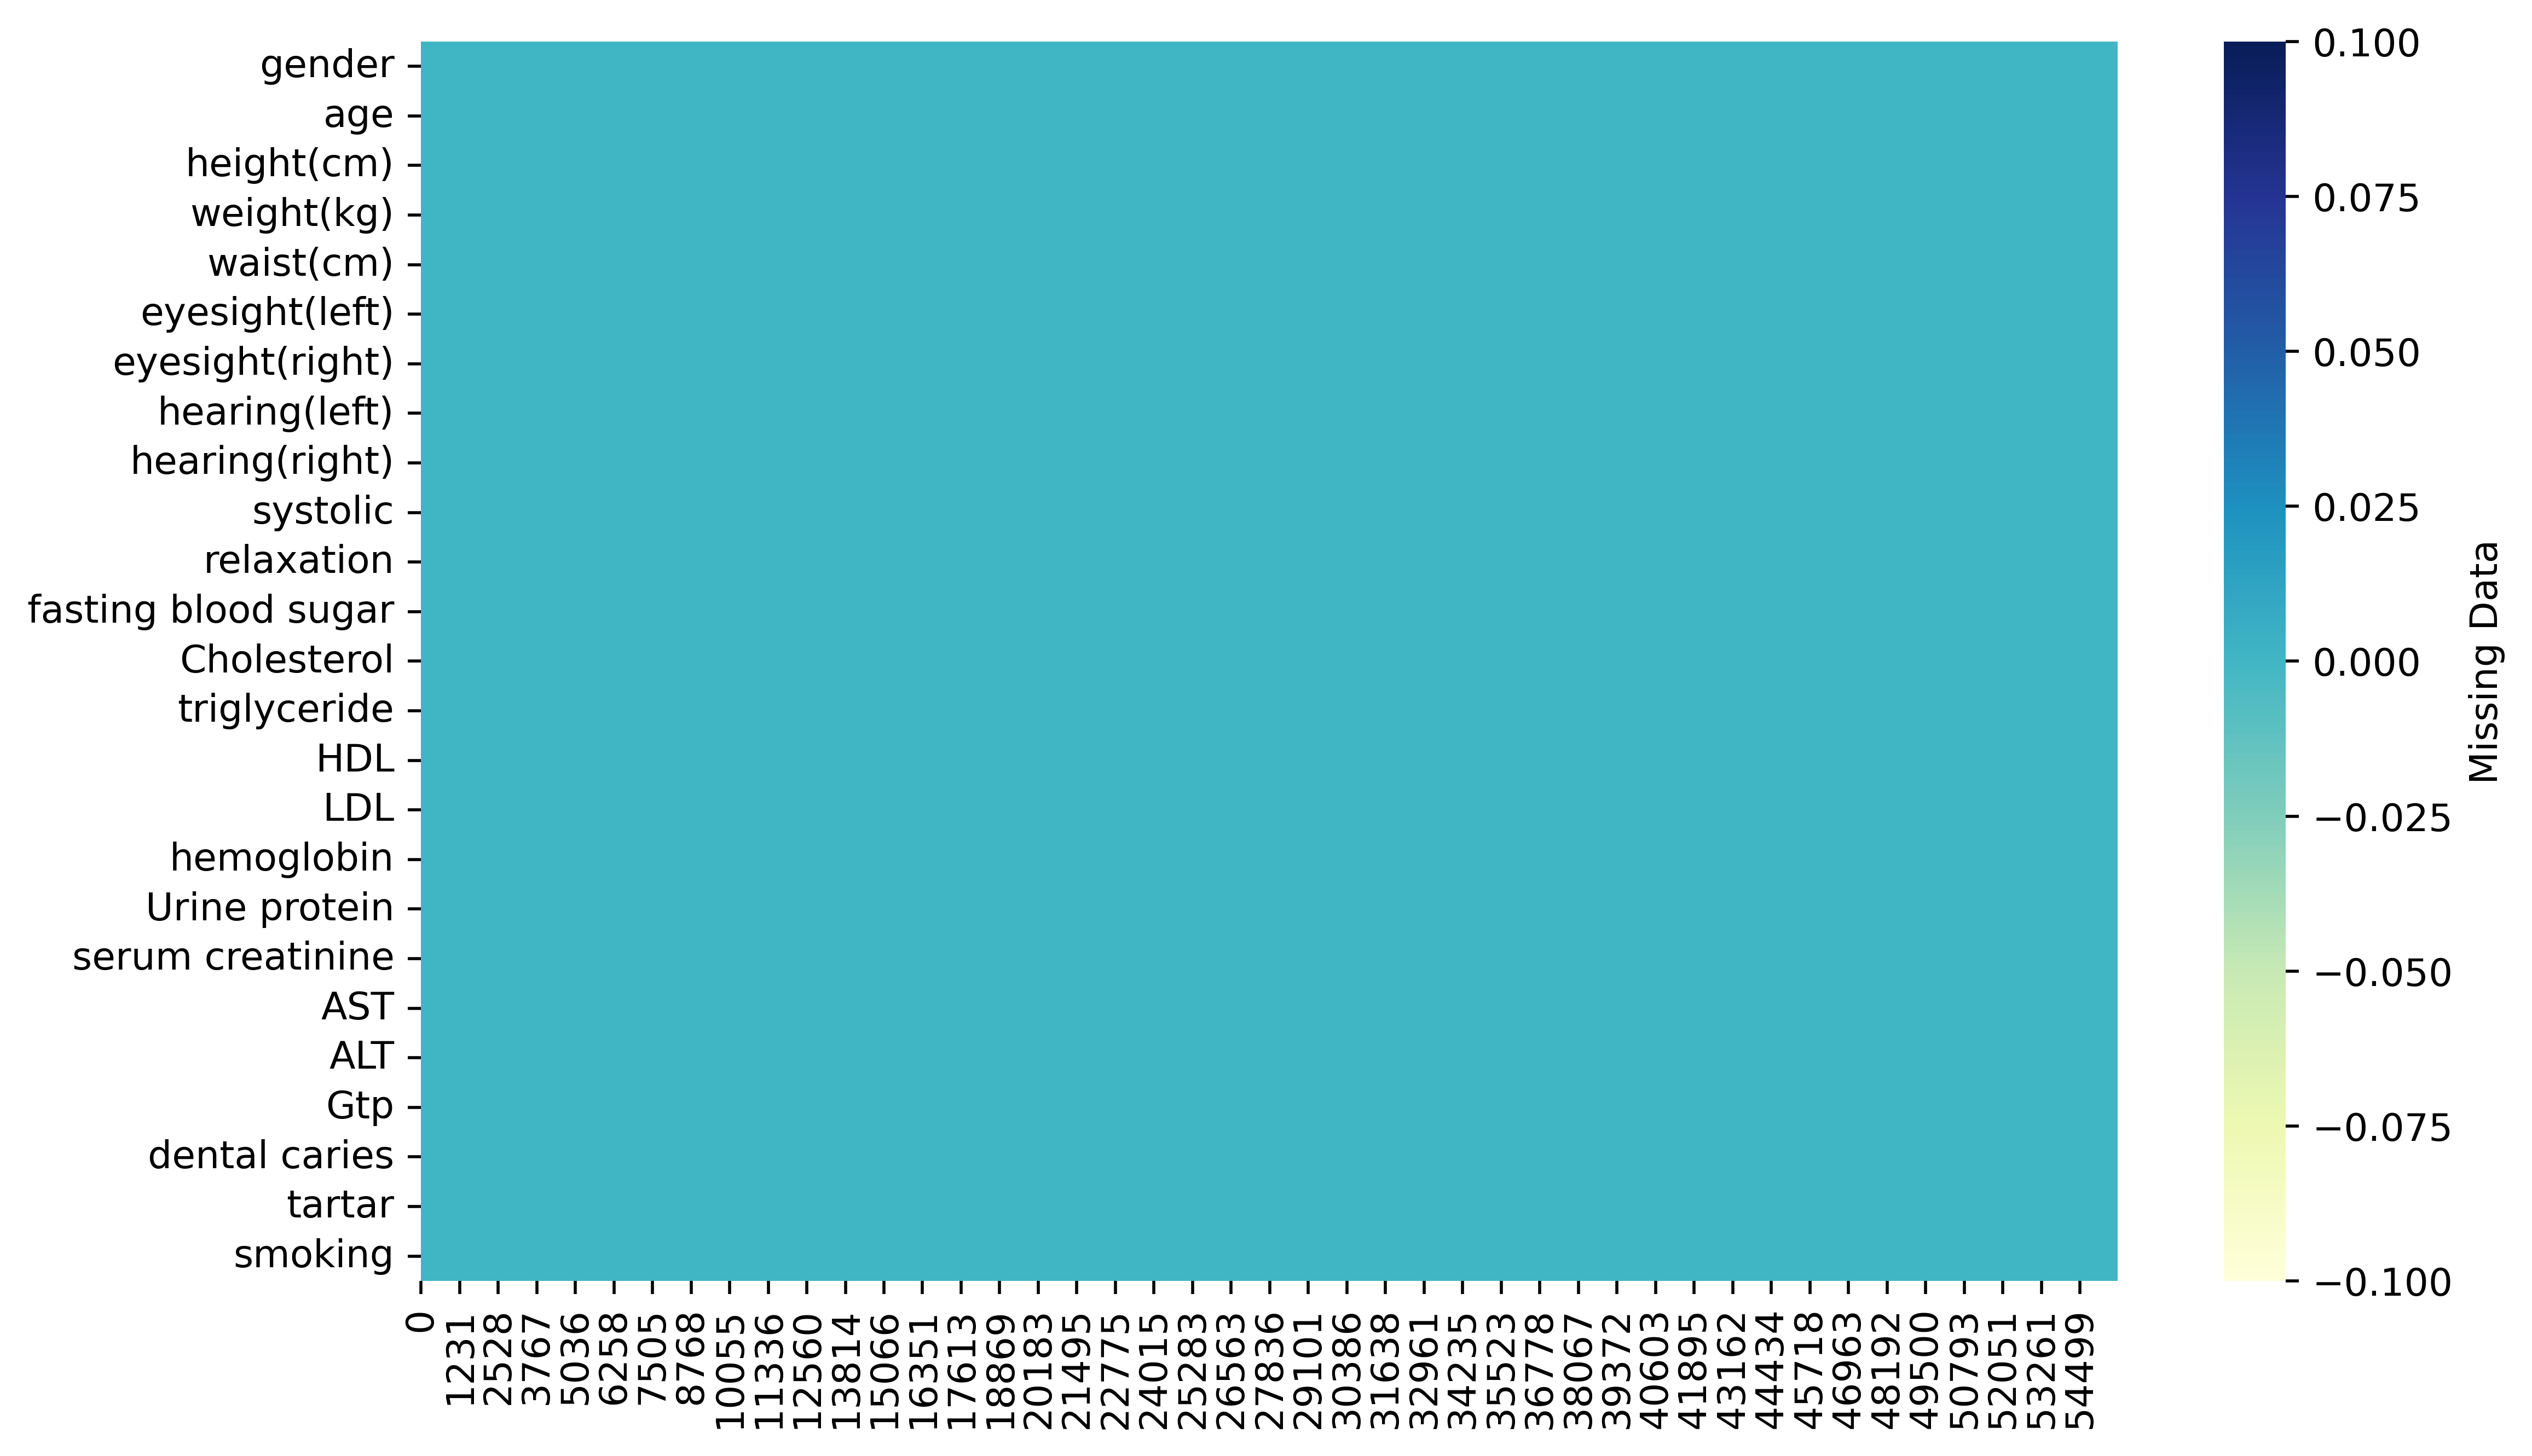

In [15]:
plt.figure(figsize=(10,6),dpi=500)
sns.heatmap(df.isnull().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [16]:
df.head()

gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0       0   40         155          60       81.3             1.2   
2       1   55         170          60       80.0             0.8   
4       0   40         155          60       86.0             1.0   
5       1   30         180          75       85.0             1.2   
6       1   40         160          60       85.5             1.0   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...    LDL  \
0              1.0            1.0             1.0     114.0  ...  126.0   
2              0.8            1.0             1.0     138.0  ...  151.0   
4              1.0            1.0             1.0     120.0  ...  107.0   
5              1.2            1.0             1.0     128.0  ...  129.0   
6              1.0            1.0             1.0     116.0  ...  157.0   

   hemoglobin  Urine protein  serum creatinine   AST   ALT   Gtp  \
0        12.9            1.0               0.7  18.0  19.0  27.0   
2        15.8            1.0               1.0  21.0  16.0  22.0   
4        12.5            1.0               0.6  16.0  14.0  22.0   
5        16.2            1.0               1.2  18.0  27.0  33.0   
6        17.0            1.0               0.7  21.0  27.0  39.0   

   dental caries  tartar  smoking  
0              0       1        0  
2              0       0        1  
4              0       0        0  
5              0       1        0  
6              1       1        1  

[5 rows x 25 columns]

In [17]:
plt.figure(figsize=(18,18),dpi=500)
sns.heatmap(df.corr(),annot=True)
plt.show()

# Feature Selection

In [18]:
#0.3 and high
thres = 0.15
ls = df.corr().iloc[24,:]

important_feature = []
indis = int(0)
for i in ls:
#     print(i)
    if i >= thres:
        important_feature.append(df.columns[indis])
    indis += 1
print(important_feature)
# important_feature = [2,3,16,25]

['gender', 'height(cm)', 'weight(kg)', 'waist(cm)', 'triglyceride', 'hemoglobin', 'serum creatinine', 'Gtp', 'smoking']


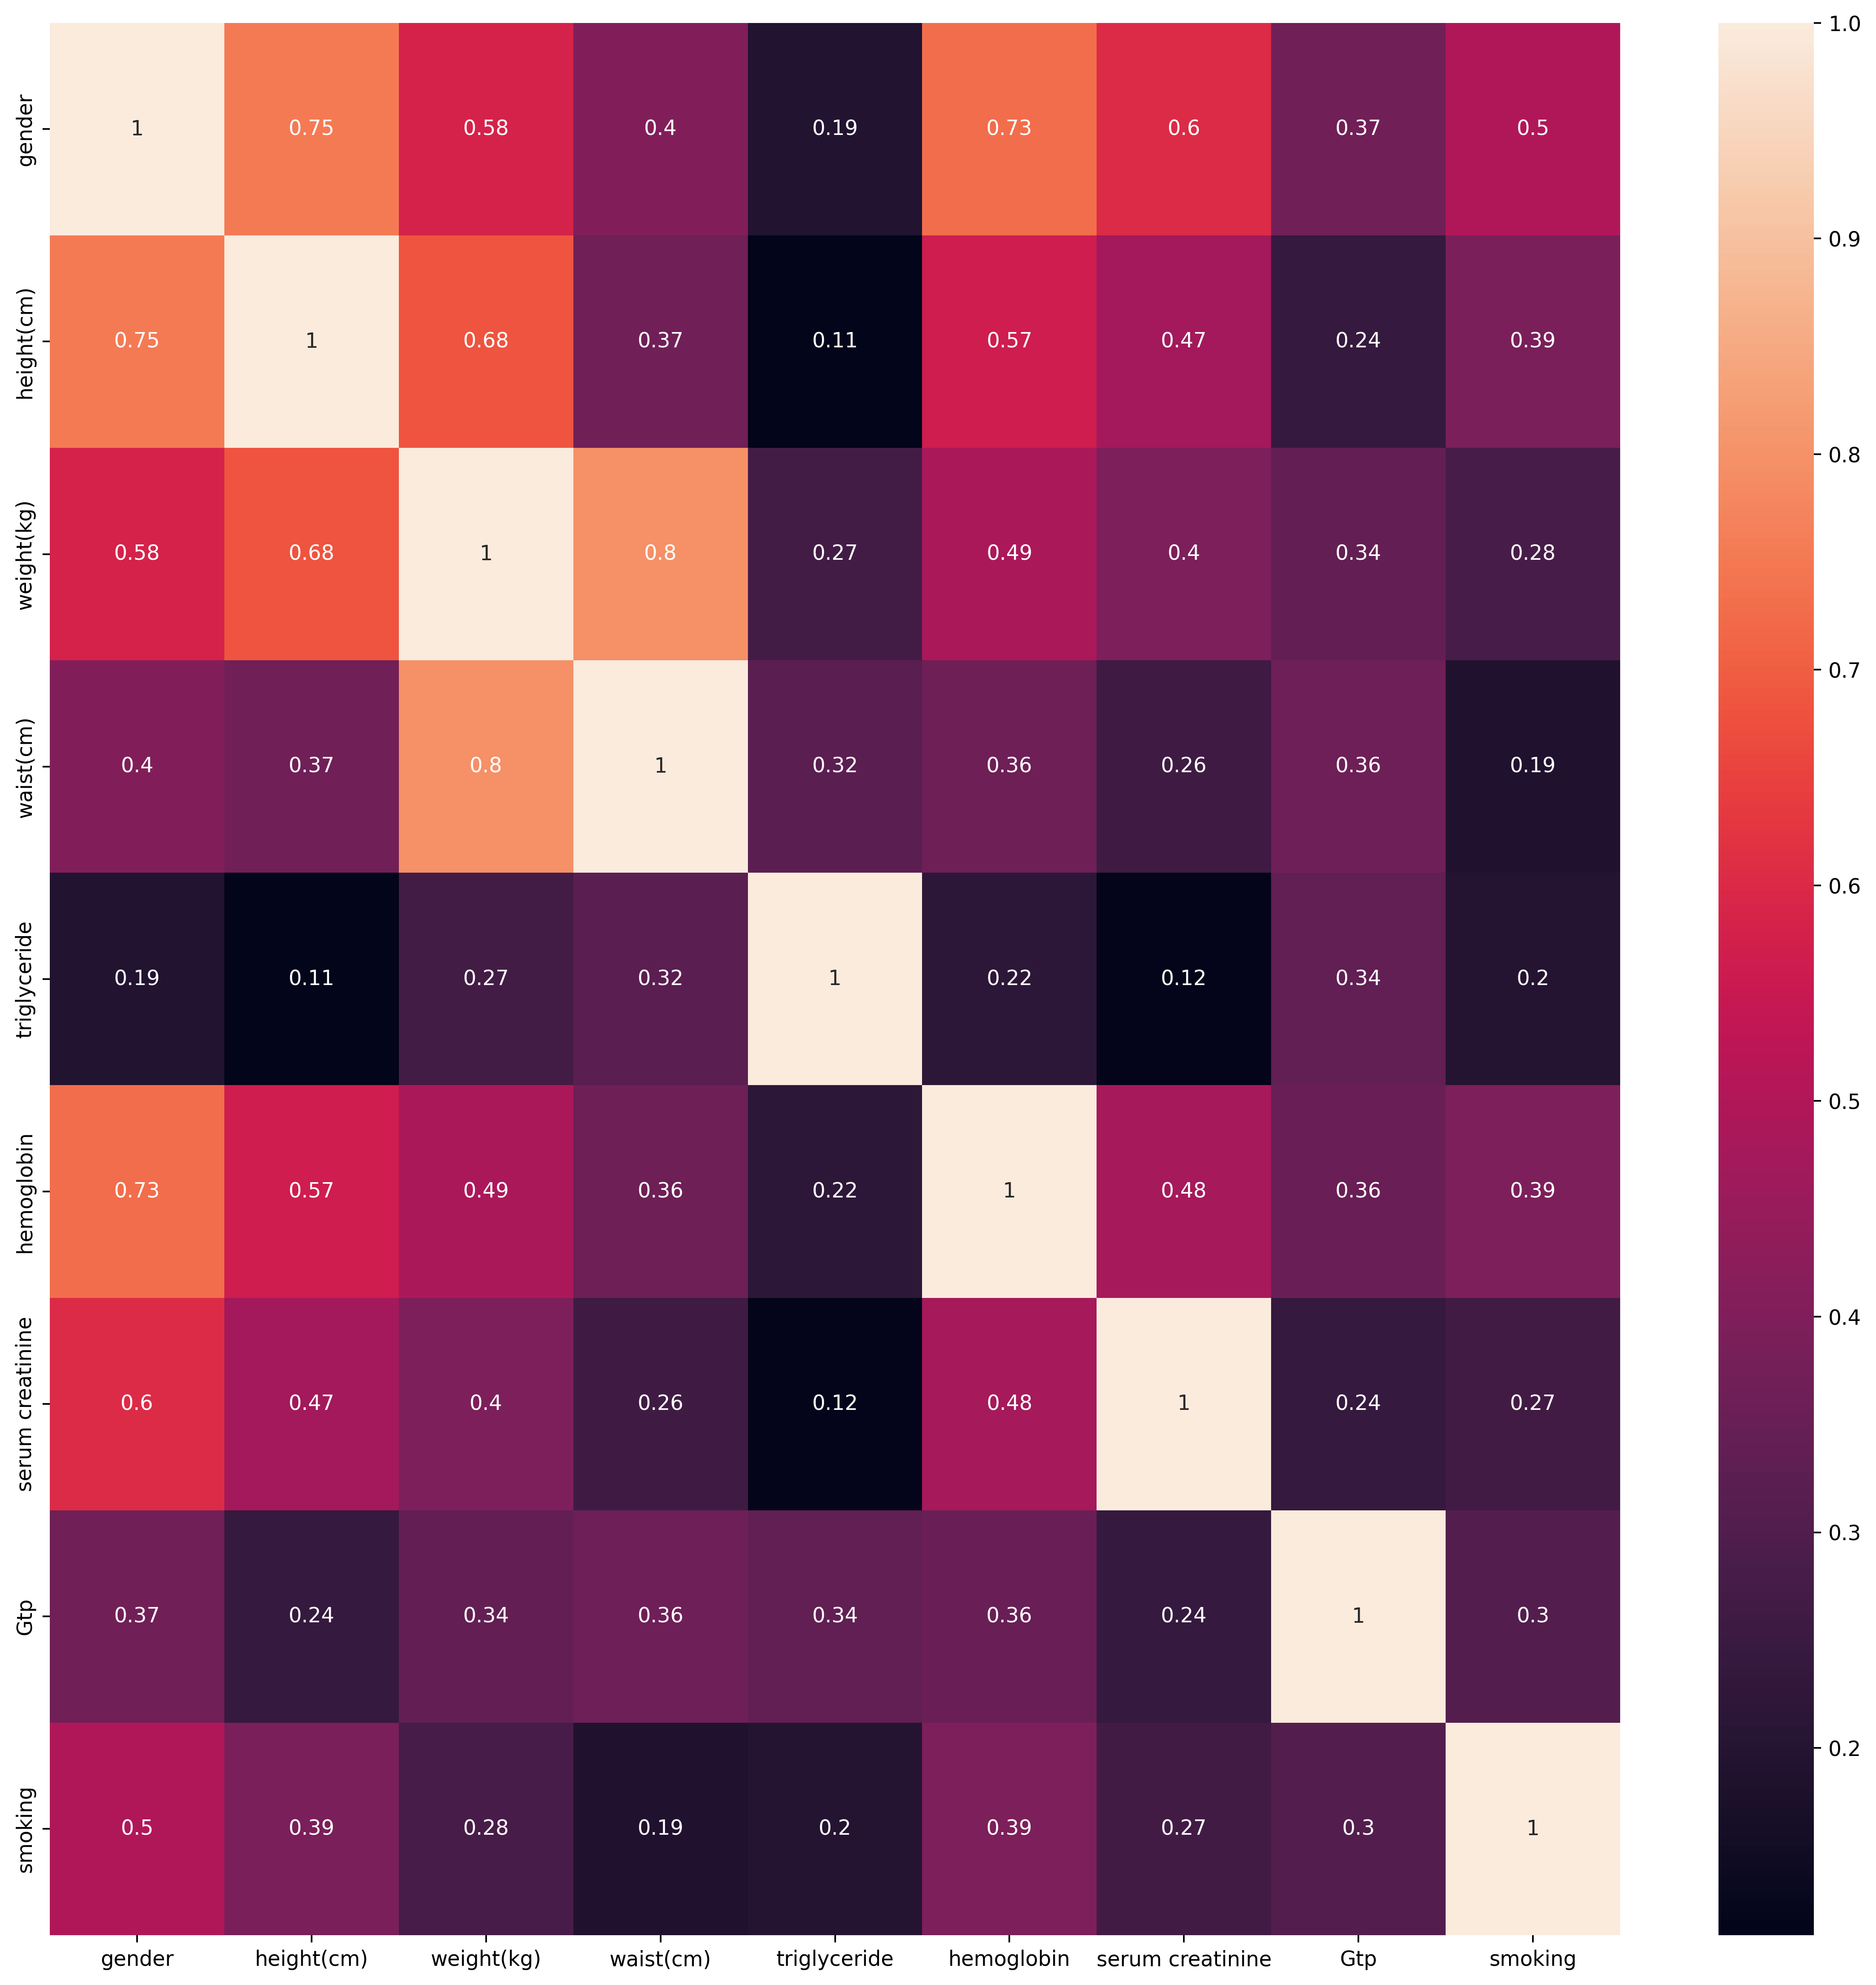

In [19]:
plt.figure(figsize=(17,17),dpi=350)
sns.heatmap(df[important_feature].corr(),annot=True)
plt.show()

Özellik seçimi sonrasında tekrardan bir korelasyon matrisi seçildi. Bu matristen görüldüğü üzere seçilen çoğu özellik aslında cinsiyet
değişkeni ile yüksek korelasyona sahip olmaktadır. Bu sebeple analizlerde cinsiyet değişkeni dikkate alınarak inceleme yapılacaktır.


Gender

Female Rate :  0.04
Male Rate   :  0.51


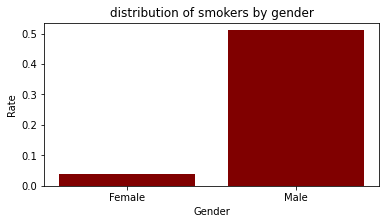

In [20]:
f1 = df.loc[(df["gender"]==0) & (df["smoking"]==1)].shape[0]
f0 = df.loc[(df["gender"]==0) & (df["smoking"]==0)].shape[0]

m1 = df.loc[(df["gender"]==1) & (df["smoking"]==1)].shape[0]
m0 = df.loc[(df["gender"]==1) & (df["smoking"]==0)].shape[0]
f_rate = round(f1/(f1+f0),2)
m_rate = round(m1/(m1+m0),2)
print("Female Rate : ",round(f1/(f1+f0),2))
print("Male Rate   : ",round(m1/(m1+m0),2))
# f1 , f0 , m1 , m0


data = {"Female" : f_rate , "Male" : m_rate}
label = ["Female","Male"]
value = [f_rate,m_rate]
plt.figure(figsize=(6,3))
plt.bar(label, value, color ='maroon')

plt.xlabel("Gender")
plt.ylabel("Rate")
plt.title("distribution of smokers by gender")
plt.show()

In [21]:
female = df.loc[df["gender"]==0]
male   = df.loc[df["gender"]==1]
female.shape,male.shape

((13699, 25), (20253, 25))

In [22]:
important_feature

['gender',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'triglyceride',
 'hemoglobin',
 'serum creatinine',
 'Gtp',
 'smoking']

# HEIGHT smoking gender

In [23]:
female0 = int(np.mean(female.loc[df["smoking"]==0]["height(cm)"]))
female1 = int(np.mean(female.loc[df["smoking"]==1]["height(cm)"]))
male0 = int(np.mean(male.loc[df["smoking"]==0]["height(cm)"]))
male1 = int(np.mean(male.loc[df["smoking"]==1]["height(cm)"]))
data = [["Female",female0,female1],["Male",male0,male1]]
cf = pd.DataFrame(data=data,columns=["Gender","Smoking","Non Smoking"])
cf.shape
cf
# female0.shape,female1.shape,np.mean(female0),np.mean(female1)

Gender  Smoking  Non Smoking
0  Female      156          157
1    Male      169          170

Sigara içmenin veya içmemenin boya herhangi bir etkisi yok

# Weight 

In [24]:
female0 = int(np.mean(female.loc[df["smoking"]==0]["weight(kg)"]))
female1 = int(np.mean(female.loc[df["smoking"]==1]["weight(kg)"]))
male0 = int(np.mean(male.loc[df["smoking"]==0]["weight(kg)"]))
male1 = int(np.mean(male.loc[df["smoking"]==1]["weight(kg)"]))
data = [["Female",female0,female1],["Male",male0,male1]]
cf = pd.DataFrame(data=data,columns=["Gender","Smoking","Non Smoking"])
cf.shape
cf

Gender  Smoking  Non Smoking
0  Female       55           55
1    Male       69           69

Sigara içmenin veya içmemenin ağırlık herhangi bir etkisi yok

# Triglyceride 

In [25]:
female0 = int(np.mean(female.loc[df["smoking"]==0]["triglyceride"]))
female1 = int(np.mean(female.loc[df["smoking"]==1]["triglyceride"]))
male0 = int(np.mean(male.loc[df["smoking"]==0]["triglyceride"]))
male1 = int(np.mean(male.loc[df["smoking"]==1]["triglyceride"]))
data = [["Female",female0,female1],["Male",male0,male1]]
cf = pd.DataFrame(data=data,columns=["Gender","Smoking","Non Smoking"])
cf.shape
cf

Gender  Smoking  Non Smoking
0  Female       95          107
1    Male      108          124

triglyceride sigara içen ve içmeyen insanlarda %10-%20 oranında fark oluşmaktadır.

# Hemoglobin 

In [26]:
female0 = int(np.mean(female.loc[df["smoking"]==0]["hemoglobin"]))
female1 = int(np.mean(female.loc[df["smoking"]==1]["hemoglobin"]))
male0 = int(np.mean(male.loc[df["smoking"]==0]["hemoglobin"]))
male1 = int(np.mean(male.loc[df["smoking"]==1]["hemoglobin"]))
data = [["Female",female0,female1],["Male",male0,male1]]
cf = pd.DataFrame(data=data,columns=["Gender","Smoking","Non Smoking"])
cf.shape
cf

Gender  Smoking  Non Smoking
0  Female       13           13
1    Male       15           15

# Serum creatinine

In [27]:
female0 = int(np.mean(female.loc[df["smoking"]==0]["serum creatinine"]))
female1 = int(np.mean(female.loc[df["smoking"]==1]["serum creatinine"]))
male0 = int(np.mean(male.loc[df["smoking"]==0]["serum creatinine"]))
male1 = int(np.mean(male.loc[df["smoking"]==1]["serum creatinine"]))
data = [["Female",female0,female1],["Male",male0,male1]]
cf = pd.DataFrame(data=data,columns=["Gender","Smoking","Non Smoking"])
cf.shape
cf


Gender  Smoking  Non Smoking
0  Female        0            0
1    Male        0            0

# Gtp

In [28]:

female0 = int(np.mean(female.loc[df["smoking"]==0]["Gtp"]))
female1 = int(np.mean(female.loc[df["smoking"]==1]["Gtp"]))
male0 = int(np.mean(male.loc[df["smoking"]==0]["Gtp"]))
male1 = int(np.mean(male.loc[df["smoking"]==1]["Gtp"]))
data = [["Female",female0,female1],["Male",male0,male1]]
cf = pd.DataFrame(data=data,columns=["Gender","Smoking","Non Smoking"])
cf.shape
cf

Gender  Smoking  Non Smoking
0  Female       19           23
1    Male       26           30

Sigara içen ve içmeyen insanlar arasında %20 oranında bir fark oluşmaktadır.

In [29]:
# selected = df.iloc[:,important_feature]
df.iloc[:,surekli] = MinMaxScaler(feature_range=(0,1)).fit_transform(df.iloc[:,surekli])
selected = df[important_feature]
selected.shape

(33952, 9)

In [30]:
selected.columns

Index(['gender', 'height(cm)', 'weight(kg)', 'waist(cm)', 'triglyceride',
       'hemoglobin', 'serum creatinine', 'Gtp', 'smoking'],
      dtype='object')

In [31]:
"Smoking Count",selected[selected["smoking"]==1].shape,"Non Smoking Count",selected[selected["smoking"]==0].shape

('Smoking Count', (10913, 9), 'Non Smoking Count', (23039, 9))

# Database Balance

In [32]:
f = selected[selected["gender"]==0]
m = selected[selected["gender"]==1]

f.shape[0] ,m.shape[0]

(13699, 20253)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='gender', ylabel='count'>

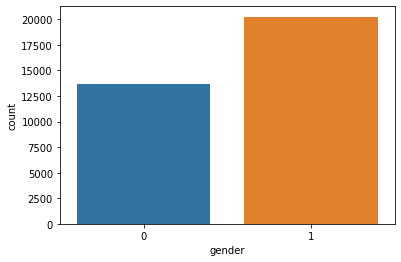

In [33]:
plt.figure()
sns.countplot("gender",data=selected) 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='smoking', ylabel='count'>

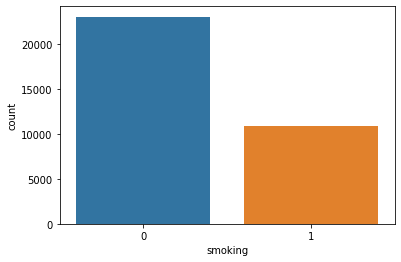

In [34]:
plt.figure()
sns.countplot("smoking",data=selected)

In [35]:
positive = selected[selected["smoking"] == 1]
negative =selected[selected["smoking"] == 0]
negative = negative.sample(frac=1)[0:positive.shape[0]]   
print("Positive Size: ",len(positive))
print("Negative Size: ", len(negative))
dataset = [positive[:],negative[:]]
dataset = pd.concat(dataset)
selected = dataset
selected.shape

Positive Size:  10913
Negative Size:  10913


(21826, 9)

In [36]:
selected.head()

gender  height(cm)  weight(kg)  waist(cm)  triglyceride  hemoglobin  \
2        1       0.625    0.357143   0.457380      0.646840    0.632184   
6        1       0.375    0.357143   0.571726      0.223048    0.770115   
18       1       0.500    0.428571   0.436590      0.412639    0.770115   
20       1       0.625    0.214286   0.207900      0.256506    0.471264   
22       1       0.750    0.357143   0.353430      0.267658    0.586207   

    serum creatinine       Gtp  smoking  
2           0.666667  0.316667        1  
6           0.166667  0.600000        1  
18          0.500000  0.550000        1  
20          0.333333  0.316667        1  
22          0.666667  0.533333        1

# SPLIT TRAIN AND TEST

In [37]:
inputs  = selected.drop(columns=["smoking"])
outputs = selected["smoking"]

In [38]:
X,x,Y,y = train_test_split(inputs,outputs,test_size=0.25)

# MODELS

 # KNN

In [39]:
knn = KNeighborsClassifier()
k_range = list(range(3, 22,2))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X, Y)
grid_search.best_score_,grid_search.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


(0.7534984459317167, {'n_neighbors': 21})

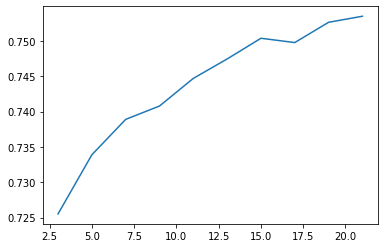

In [40]:
result = pd.DataFrame(grid_search.cv_results_) 
plt.plot(result["param_n_neighbors"],result["mean_test_score"])

In [41]:
knn_pred = grid_search.predict(x)

print("f1 Score : ",f1_score(y,knn_pred))
print("Precision Score : ",precision_score(y,knn_pred))
print("Recall Score : ",recall_score(y,knn_pred))

f1 Score :  0.7914020517830972
Precision Score :  0.7176609568812758
Recall Score :  0.8820326678765881


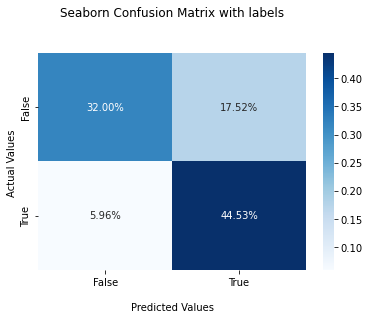

In [42]:
knn_matrix = confusion_matrix(y,knn_pred)
ax = sns.heatmap(knn_matrix/np.sum(knn_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# RANDOM FOREST

In [43]:
RF = RandomForestClassifier()
rf_param_grid = {"max_features":list(range(3,8)),
                    "n_estimators" : list(range(25,201,25))
                }
rf_grid = GridSearchCV(RF, rf_param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
rf_grid_search=rf_grid.fit(X, Y)
rf_grid_search.best_score_,rf_grid_search.best_params_

Fitting 10 folds for each of 40 candidates, totalling 400 fits


(0.7877703190134019, {'max_features': 3, 'n_estimators': 150})

In [44]:
rf_pred = rf_grid_search.predict(x)
print("f1 Score : ",f1_score(y,rf_pred))
print("Precision Score : ",precision_score(y,rf_pred))
print("Recall Score : ",recall_score(y,rf_pred))

f1 Score :  0.823923605294019
Precision Score :  0.7650902302426882
Recall Score :  0.8925589836660617


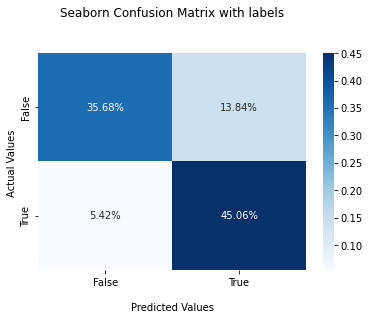

In [45]:
rf_matrix = confusion_matrix(y,rf_pred)
ax = sns.heatmap(rf_matrix/np.sum(rf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# SVM

In [46]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.001]}
svc_grid_search = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1,cv=10,scoring='accuracy',return_train_score=False)
svc_grid_search.fit(X,Y)
print(svc_grid_search.best_score_)
print(svc_grid_search.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
0.7606462638884117
{'C': 0.1, 'gamma': 1}


In [47]:
svm_pred = svc_grid_search.predict(x)
print("f1 Score : ",f1_score(y,svm_pred))
print("Precision Score : ",precision_score(y,svm_pred))
print("Recall Score : ",recall_score(y,svm_pred))

f1 Score :  0.8089093701996927
Precision Score :  0.7011984021304927
Recall Score :  0.9557168784029038


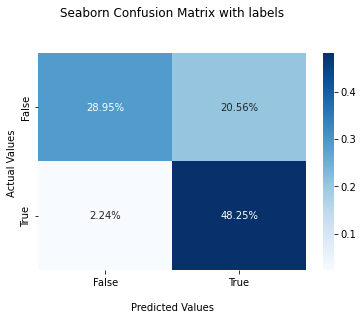

In [48]:
svm_matrix = confusion_matrix(y,svm_pred)
ax = sns.heatmap(svm_matrix/np.sum(svm_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# RESULTS

In [49]:

# import pandas as pd
import pandas as pd 
    
# List1 
lst = [
        ["KNN",f1_score(y,knn_pred), precision_score(y,knn_pred),recall_score(y,knn_pred)], 
        ["Random Forest",f1_score(y,rf_pred), precision_score(y,rf_pred),recall_score(y,rf_pred)],
        ['SVM',f1_score(y,svm_pred), precision_score(y,svm_pred),recall_score(y,svm_pred)]
      ]
    
df = pd.DataFrame(lst, columns =['Algortihm Name', 'F1-Score', 'Precision',"Recall"])
df

Algortihm Name  F1-Score  Precision    Recall
0            KNN  0.791402   0.717661  0.882033
1  Random Forest  0.823924   0.765090  0.892559
2            SVM  0.808909   0.701198  0.955717